# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [17]:
print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    url=f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    response= requests.get(url)
    if(str(response)=="<Response [200]>"):
        print(f"Processing City {city}")
    else:
        print("City not found skipping")

Beginning Data Retrieval
-----------------------------
Processing City fortuna
Processing City kapaa
City not found skipping
Processing City saint george
Processing City esna
Processing City mandalgovi
Processing City urucara
Processing City hermanus
City not found skipping
Processing City kodiak
Processing City tuktoyaktuk
Processing City punta arenas
Processing City tura
Processing City east london
Processing City barrow
Processing City touros
Processing City nyurba
Processing City ahmadnagar
Processing City madimba
Processing City dikson
Processing City kaitangata
Processing City mastic beach
Processing City bluff
Processing City buala
Processing City ossora
Processing City kathu
Processing City albany
Processing City ancud
Processing City inhambane
Processing City avarua
Processing City sola
Processing City inuvik
Processing City coquimbo
Processing City victoria
Processing City port hawkesbury
Processing City hobart
Processing City rikitea
Processing City aklavik
Processing City d

Processing City gazli
Processing City tondano
Processing City lebu
Processing City todos santos
Processing City sayyan
Processing City ambulu
Processing City fonte boa
Processing City grindavik
Processing City zabol
Processing City biloela
Processing City ruiru
Processing City leningradskiy
Processing City huarmey
Processing City codrington
Processing City taicheng
Processing City deputatskiy
Processing City biak
Processing City sikeston
Processing City saryagash
Processing City beloha
Processing City urman
Processing City ajaccio
Processing City mirnyy
Processing City georgetown
Processing City biscarrosse
Processing City cabo san lucas
Processing City aquiraz
City not found skipping
Processing City soyo
Processing City pacifica
Processing City synya
Processing City cururupu
Processing City jiazi
Processing City ouargaye
Processing City gamba
Processing City mantua
Processing City cambuci
Processing City gizo
Processing City adrar
Processing City samfya
Processing City faya
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
#Print one city information
url=f"http://api.openweathermap.org/data/2.5/weather?q=fortuna&appid={weather_api_key}"
response= requests.get(url).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.6,
        "lon": -124.16
    },
    "dt": 1592492967,
    "id": 5563839,
    "main": {
        "feels_like": 285.65,
        "humidity": 100,
        "pressure": 1017,
        "temp": 285.86,
        "temp_max": 287.04,
        "temp_min": 284.15
    },
    "name": "Fortuna",
    "sys": {
        "country": "US",
        "id": 4127,
        "sunrise": 1592484335,
        "sunset": 1592538615,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 402,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 150,
        "speed": 1.5
    }
}


In [24]:
#Cretate a dictionary of one city
weather_dict= {"City":"fortuna", "Lat":response["coord"]["lat"],"Lng":response["coord"]["lon"], 
               "Max Temp":response["main"]["temp_max"], "Humidity": response["main"]["humidity"],
               "Cloudiness":response["clouds"]["all"], "Wind Speed": response["wind"]["speed"],
               "Country":response["sys"]["country"], "Date":response["dt"]}
weather_dict

{'City': 'fortuna',
 'Cloudiness': 90,
 'Country': 'US',
 'Date': 1592492967,
 'Humidity': 100,
 'Lat': 40.6,
 'Lng': -124.16,
 'Max Temp': 287.04,
 'Wind Speed': 1.5}

In [29]:
#make empty list to contain the dictioaries of multiple cities
list_cityWeather= []
# Create a for loop to add each city information to the list 
for city in cities:
    url=f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    response= requests.get(url)
    if(str(response)=="<Response [200]>"):
        response=response.json()
        weather_dict= {"City":city, "Lat":response["coord"]["lat"],"Lng":response["coord"]["lon"], 
               "Max Temp":response["main"]["temp_max"], "Humidity": response["main"]["humidity"],
               "Cloudiness":response["clouds"]["all"], "Wind Speed": response["wind"]["speed"],
               "Country":response["sys"]["country"], "Date":response["dt"]}
        list_cityWeather.append(weather_dict)
list_cityWeather

[{'City': 'fortuna',
  'Cloudiness': 75,
  'Country': 'US',
  'Date': 1592494288,
  'Humidity': 100,
  'Lat': 40.6,
  'Lng': -124.16,
  'Max Temp': 287.04,
  'Wind Speed': 1.5},
 {'City': 'kapaa',
  'Cloudiness': 40,
  'Country': 'US',
  'Date': 1592494018,
  'Humidity': 83,
  'Lat': 22.08,
  'Lng': -159.32,
  'Max Temp': 298.15,
  'Wind Speed': 6.7},
 {'City': 'saint george',
  'Cloudiness': 1,
  'Country': 'US',
  'Date': 1592493860,
  'Humidity': 18,
  'Lat': 37.1,
  'Lng': -113.58,
  'Max Temp': 294.15,
  'Wind Speed': 2.1},
 {'City': 'esna',
  'Cloudiness': 0,
  'Country': 'EG',
  'Date': 1592494406,
  'Humidity': 22,
  'Lat': 25.29,
  'Lng': 32.55,
  'Max Temp': 312.15,
  'Wind Speed': 5.1},
 {'City': 'mandalgovi',
  'Cloudiness': 84,
  'Country': 'MN',
  'Date': 1592494493,
  'Humidity': 24,
  'Lat': 45.76,
  'Lng': 106.27,
  'Max Temp': 295.67,
  'Wind Speed': 0.33},
 {'City': 'urucara',
  'Cloudiness': 100,
  'Country': 'BR',
  'Date': 1592494019,
  'Humidity': 61,
  'Lat': -2

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [32]:
# Convert list of dictionaries to a dataframe
df_weather = pd.DataFrame(list_cityWeather)
df_weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,fortuna,40.60,-124.16,287.04,100,75,1.50,US,1592494288
1,kapaa,22.08,-159.32,298.15,83,40,6.70,US,1592494018
2,saint george,37.10,-113.58,294.15,18,1,2.10,US,1592493860
3,esna,25.29,32.55,312.15,22,0,5.10,EG,1592494406
4,mandalgovi,45.76,106.27,295.67,24,84,0.33,MN,1592494493


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [31]:
df_weather.describe()
# We can see from max humidity in the describe below that max humidity = 100 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,5.540000e+02
mean,21.170921,18.235668,294.362184,67.207581,49.425993,3.840957,1.592494e+09
std,32.033911,90.520611,8.471170,21.389910,37.708779,2.608257,1.028700e+02
min,-54.800000,-175.200000,273.150000,6.000000,0.000000,0.330000,1.592494e+09
25%,-3.762500,-61.832500,288.150000,55.000000,10.500000,2.022500,1.592494e+09
50%,24.160000,23.960000,296.040000,71.000000,43.000000,3.145000,1.592494e+09
75%,47.167500,102.087500,300.487500,83.000000,88.000000,5.100000,1.592494e+09
max,78.220000,179.320000,317.980000,100.000000,100.000000,17.000000,1.592494e+09


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

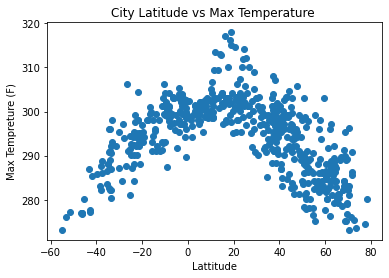

In [71]:
df_lat_Maxtemp= df_weather[["Lat", "Max Temp"]]
plt.scatter(df_lat_Maxtemp["Lat"], df_lat_Maxtemp["Max Temp"])
plt.xlabel("Lattitude")
plt.ylabel("Max Tempreture (F)")
plt.title("City Latitude vs Max Temperature ")
plt.show()

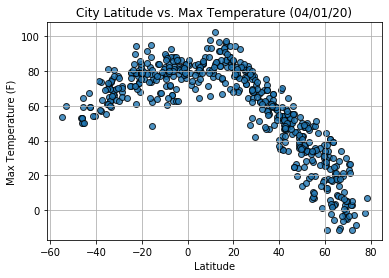

## Latitude vs. Humidity Plot

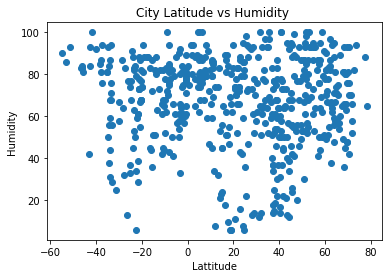

In [40]:
df_lat_humidity= df_weather[["Lat", "Humidity"]]
plt.scatter(df_lat_humidity["Lat"], df_lat_humidity["Humidity"])
plt.xlabel("Lattitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs Humidity ")
plt.show()

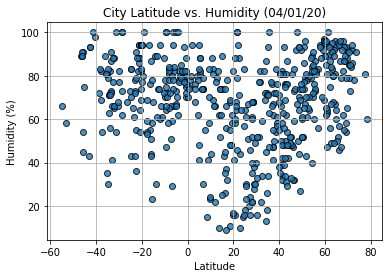

## Latitude vs. Cloudiness Plot

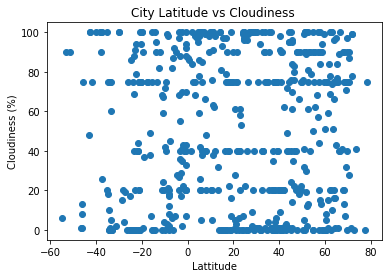

In [43]:
df_lat_Cloudiness= df_weather[["Lat", "Cloudiness"]]
plt.scatter(df_lat_Cloudiness["Lat"], df_lat_Cloudiness["Cloudiness"])
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness ")
plt.show()

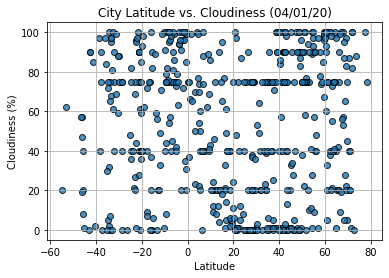

## Latitude vs. Wind Speed Plot

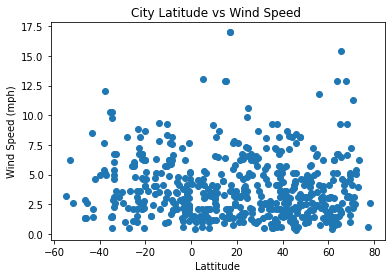

In [45]:
df_lat_WindSpeed= df_weather[["Lat", "Wind Speed"]]
plt.scatter(df_lat_WindSpeed["Lat"], df_lat_WindSpeed["Wind Speed"])
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed ")
plt.show()

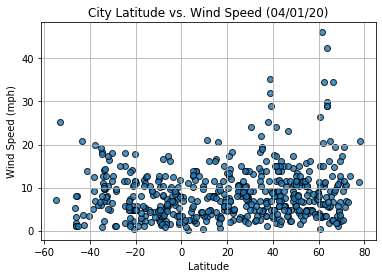

## Linear Regression

In [80]:
# OPTIONAL: Create a function to create Linear Regression plots
def pltLR(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")

In [85]:
# Create Northern and Southern Hemisphere DataFrames
df_Northern = df_weather[df_weather["Lat"]>0]
df_Southern = df_weather[df_weather["Lat"]<0]
df_Norther.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,fortuna,40.60,-124.16,287.04,100,75,1.50,US,1592494288
1,kapaa,22.08,-159.32,298.15,83,40,6.70,US,1592494018
2,saint george,37.10,-113.58,294.15,18,1,2.10,US,1592493860
3,esna,25.29,32.55,312.15,22,0,5.10,EG,1592494406
4,mandalgovi,45.76,106.27,295.67,24,84,0.33,MN,1592494493


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

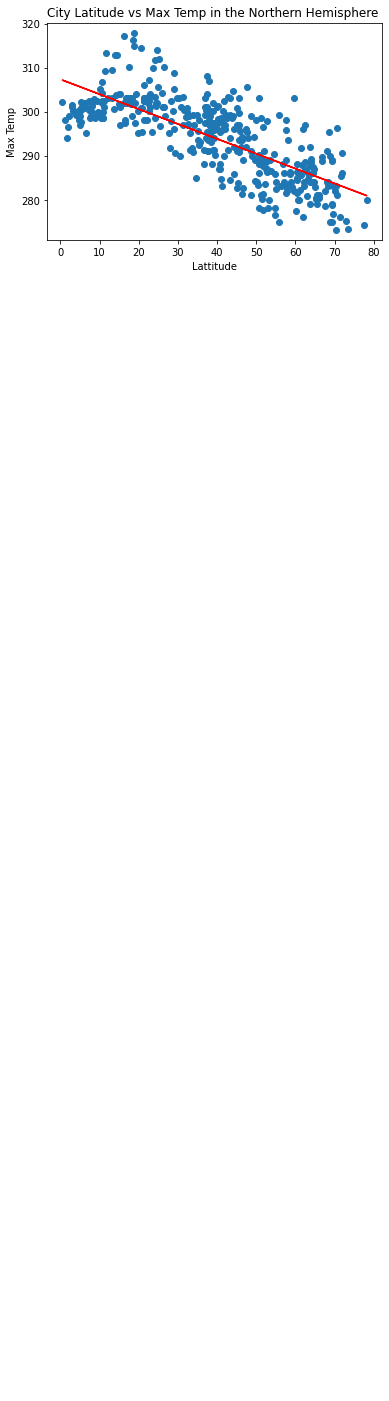

In [88]:
df_lat_MaxTemp= df_Northern[["Lat", "Max Temp"]]
x_values= df_lat_MaxTemp["Lat"]
y_values= df_lat_MaxTemp["Max Temp"]
#plt.scatter(df_lat_MaxTemp["Max Temp"], df_lat_MaxTemp["Lat"])
#pltLR(df_lat_MaxTemp["Max Temp"], df_lat_MaxTemp["Lat"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Lattitude")
plt.ylabel("Max Temp")
plt.title("City Latitude vs Max Temp in the Northern Hemisphere ")
plt.show()

The r-squared is: 0.8271188905041935


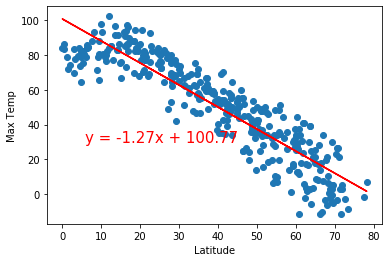

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

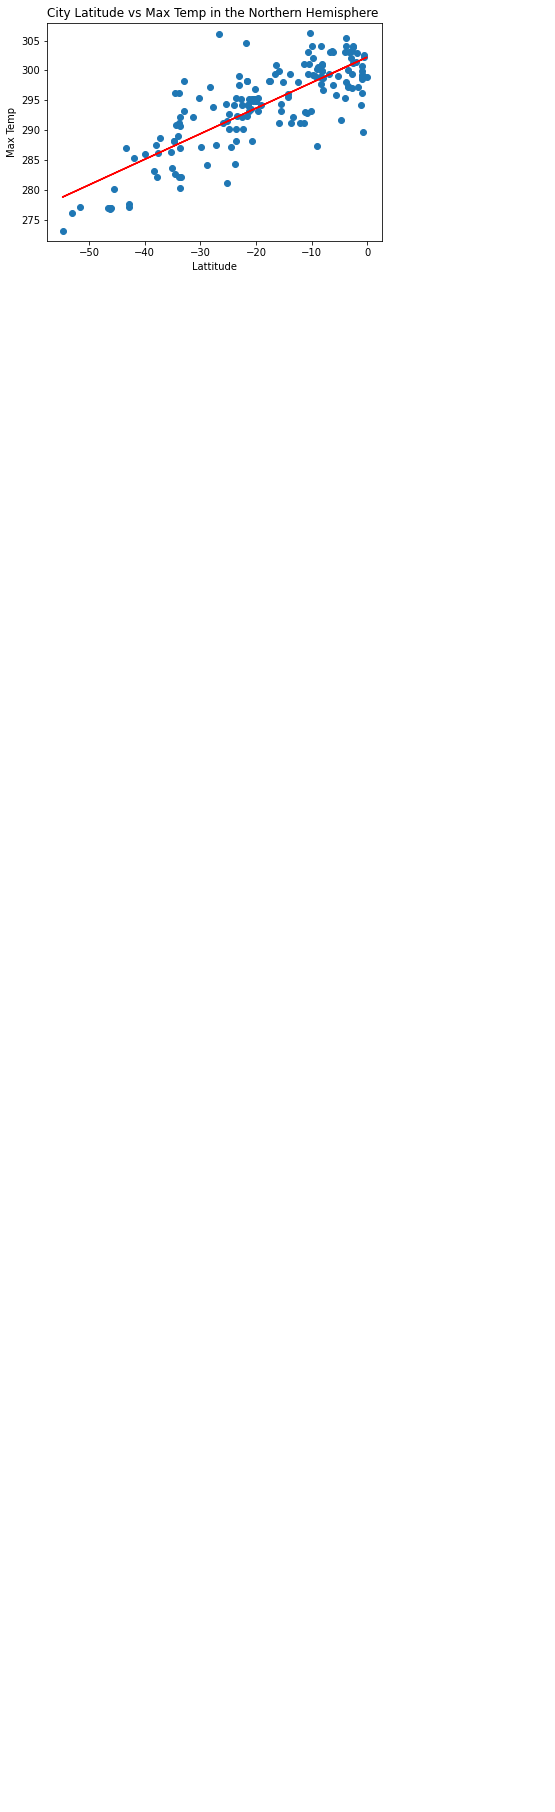

In [89]:
df_lat_MaxTemp= df_Southern[["Lat", "Max Temp"]]
x_values= df_lat_MaxTemp["Lat"]
y_values= df_lat_MaxTemp["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Lattitude")
plt.ylabel("Max Temp")
plt.title("City Latitude vs Max Temp in the Northern Hemisphere ")
plt.show()

The r-squared is: 0.39936284758885965


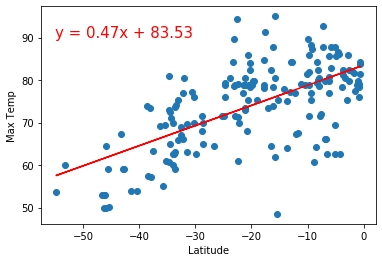

In [17]:
df_lat_MaxTemp= df_Southern[["Lat", "Max Temp"]]
x_values= df_lat_MaxTemp["Lat"]
y_values= df_lat_MaxTemp["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Lattitude")
plt.ylabel("Max Temp")
plt.title("City Latitude vs Max Temp in the Northern Hemisphere ")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

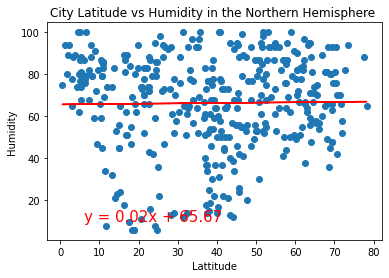

In [91]:
df_lat_Humidity= df_Northern[["Lat", "Humidity"]]
x_values= df_lat_Humidity["Lat"]
y_values= df_lat_Humidity["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Lattitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs Humidity in the Northern Hemisphere ")
plt.show()


The r-squared is: 0.10829462153873139


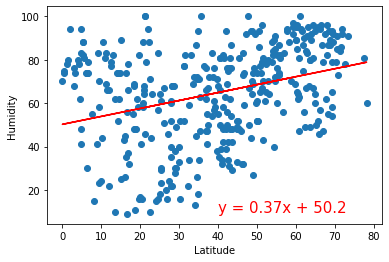

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

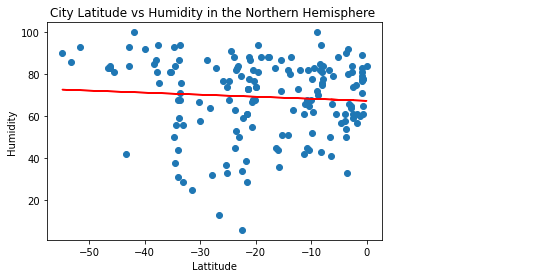

In [92]:
df_lat_Humidity= df_Southern[["Lat", "Humidity"]]
x_values= df_lat_Humidity["Lat"]
y_values= df_lat_Humidity["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Lattitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs Humidity in the Northern Hemisphere ")
plt.show()

The r-squared is: 0.0008996079328825663


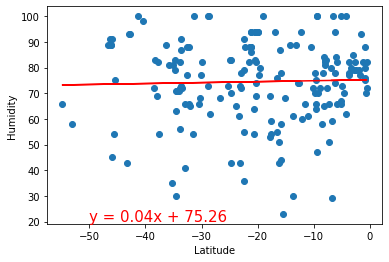

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

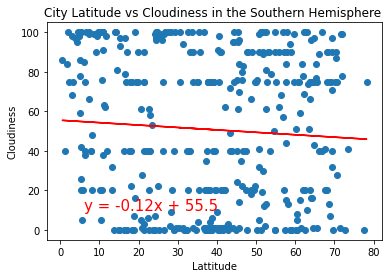

In [94]:
df_lat_Humidity= df_Northern[["Lat", "Cloudiness"]]
x_values= df_lat_Humidity["Lat"]
y_values= df_lat_Humidity["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Cloudiness in the Southern Hemisphere ")
plt.show()

The r-squared is: 0.05768812657005063


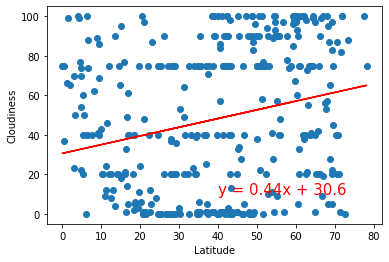

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

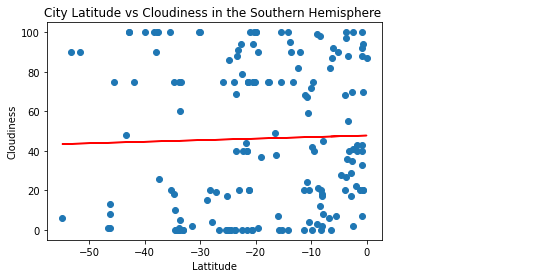

In [93]:
df_lat_Humidity= df_Southern[["Lat", "Cloudiness"]]
x_values= df_lat_Humidity["Lat"]
y_values= df_lat_Humidity["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Cloudiness in the Southern Hemisphere ")
plt.show()

The r-squared is: 0.0684912094859049


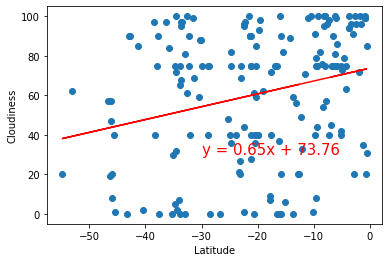

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

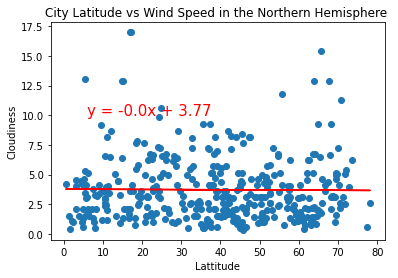

In [95]:
df_lat_WindSpeed= df_Northern[["Lat", "Wind Speed"]]
x_values= df_lat_WindSpeed["Lat"]
y_values= df_lat_WindSpeed["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Wind Speed in the Northern Hemisphere ")
plt.show()

The r-squared is: 0.023371104533850804


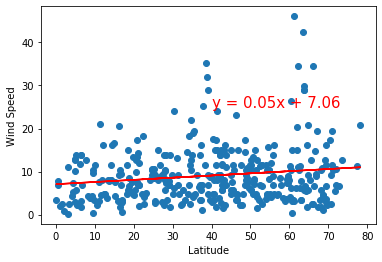

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

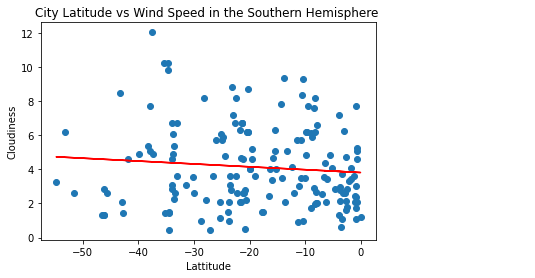

In [96]:
df_lat_WindSpeed= df_Southern[["Lat", "Wind Speed"]]
x_values= df_lat_WindSpeed["Lat"]
y_values= df_lat_WindSpeed["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Wind Speed in the Southern Hemisphere ")
plt.show()

The r-squared is: 0.03381889207758188


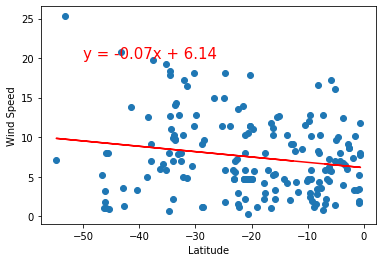